<a href="https://colab.research.google.com/github/JoosepAlbre/IDS_Project/blob/main/Inital_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import operator

plt.rcParams.update({'font.size': 18})
url = 'https://raw.githubusercontent.com/JoosepAlbre/IDS_Project/main/drug_deaths.csv'
data = pd.read_csv(url)



In [2]:
# Display column headers
print(data.columns)
# List of irrelevant columns by index
columnsToRemove = [0, 1, 3, 8, 9, 11, 13, 15, 16, 17, 18, 20, -1, -2, -3]
# Remove columns with unnecessary information
data = data.drop(data.columns[columnsToRemove], axis=1)

Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury',
       'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD',
       'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'],
      dtype='object')


In [3]:
# Count all drugs ex. Other
print(data.columns)
columns = data.columns
drugs = {}

index = 0
# Fentanyl
index = 0
for i in data['Fentanyl']:
  if i[0] == "1":
    data.at[index, 'Fentanyl'] = 1
  index += 1
data['Fentanyl'] = data['Fentanyl'].astype('int64')

# Fentanyl_Analogue to Integer
data['Fentanyl_Analogue'] = data['Fentanyl_Analogue'].astype('int64')

# Morphine_NotHeroin
index = 0
for i in data['Morphine_NotHeroin']:
  if i != "0" and i != "1":
    data.at[index, 'Morphine_NotHeroin'] = 1
  index += 1
data['Morphine_NotHeroin'] = data['Morphine_NotHeroin'].astype('int64')

# AnyOpioid
index = 0
for i in data['AnyOpioid']:
  if i != "0" and i != "1":
    data.at[index, 'AnyOpioid'] = 1
  index += 1
data['AnyOpioid'] = data['AnyOpioid'].astype('int64')

# Display counted drugs
for i in range(9, 23, 1):
  drugCount = data[columns[i]].sum()
  drugs[columns[i]] = drugCount

for i in range(24, 26, 1):
  drugCount = data[columns[i]].sum()
  drugs[columns[i]] = drugCount

print(drugs)

Index(['Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'DeathCity', 'Location',
       'DescriptionofInjury', 'COD', 'Heroin', 'Cocaine', 'Fentanyl',
       'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'MannerofDeath'],
      dtype='object')
{'Heroin': 2529, 'Cocaine': 1521, 'Fentanyl': 2232, 'Fentanyl_Analogue': 389, 'Oxycodone': 607, 'Oxymorphone': 108, 'Ethanol': 1247, 'Hydrocodone': 118, 'Benzodiazepine': 1343, 'Methadone': 474, 'Amphet': 159, 'Tramad': 130, 'Morphine_NotHeroin': 42, 'Hydromorphone': 25, 'OpiateNOS': 88, 'AnyOpioid': 2466}


In [4]:
# Replace typos, synonyms and count all drugs in Other
pd.set_option('max_rows', None)
data['Other']=data['Other'].str.lower()
data['Other']=data['Other'].str.strip()
data['Other'] = data['Other'].replace(to_replace=["buprenor", "bupren", "bupreno", "bupre", "buprenophine", "buprenor, carfentanil", "bupren, difluoro", "buprenorph", "buprenorphone", "buprnor", "buprenorphine", "buprno", "pcp. bupren", "bupren, hexadrone", "buprenorp", "buprop"],
                                      value= ["Buprenorphine", "Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine","Buprenorphine"])
data['Other'] = data['Other'].replace(to_replace=["pcp", "pcp, hydromorph", "pcp, morphine nos", "pcp, buprenor", "pcp, n-ethyl-pentylone"],
                                      value=["Phencyclidine","Phencyclidine","Phencyclidine","Phencyclidine","Phencyclidine"])
data['Other'] = data['Other'].replace(to_replace=["morph", "morphine rx", "morphine no 6mam", "morphine, hydromorph", "morph nos", "rx morphine", "morph/cod", "morphine/hydromorph", "morphiine", "morphine/cod", "morphine, no rx in pmp", "morphin", "morph pcp", "morphine"],
                                      value=["Morphine_NotHeroin", "Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin","Morphine_NotHeroin"])
data['Other'] = data['Other'].replace(to_replace=["hydromorph", "hydr-mor", "hydromorp", "h-morph", "hydro morph", "hydromorph, buprenor", "hyd-morph", "hyromorph", "hydrom", "hydmorph", "hydrmorp"],
                                      value=["Hydromorphone", "Hydromorphone","Hydromorphone","Hydromorphone","Hydromorphone","Hydromorphone","Hydromorphone","Hydromorphone","Hydromorphone","Hydromorphone" ,"Hydromorphone"])
data['Other'] = data['Other'].replace(to_replace=["duster", "diflouro", "difluro", "difluoroeth", "difluror", "difluor"],
                                      value=["Difluoroethane", "Difluoroethane","Difluoroethane","Difluoroethane","Difluoroethane","Difluoroethane"])
data['Other'] = data['Other'].replace(to_replace=["opiate", "opiates", "others", "opiate screen", "opioid nos", "opioid", "opiate in hosp?", "uk", "snorted"],
                                      value=["AnyOpioid","AnyOpioid","AnyOpioid","AnyOpioid","OpiateNOS","AnyOpioid","AnyOpioid", "AnyOpioid" ,"AnyOpioid"])
data['Other'] = data['Other'].replace(to_replace=["u47700", "u-47700, carfentanil", "u-47700 synthetic opioid","u-47700"],
                                      value=["U-47700", "U-47700","U-47700", "U-47700"])
data['Other'] = data['Other'].replace(to_replace=["mdma", "mdma, pcp", "mdma, n-ethyl-pentylone"],
                                      value=["Ecstasy","Ecstasy","Ecstasy"])
data['Other'] = data['Other'].replace(to_replace=["ket", "ketamine"],
                                      value=["Ketamine", "Ketamine"])
data['Other'] = data['Other'].replace(to_replace=["cod", "codeine"],
                                      value=["Codeine", "Codeine"])
data['Other'] = data['Other'].replace(to_replace=["butal", "butalb", "butalbital"],
                                      value=["Butalbital", "Butalbital", "Butalbital"])
data['Other'] = data['Other'].replace(to_replace=["mitragine", "mirtagynine"],
                                      value=["Mitragynine", "Mitragynine"])
data['Other'] = data['Other'].replace(to_replace=["zolp", "zolpidem"],
                                      value=["Zolpidem", "Zolpidem"])
data['Other'] = data['Other'].replace(to_replace=["diphen, chlorphen", "diphenhydramine, zolpidem", "diphenh", "diphenhy" ],
                                      value=["Diphenhydramine","Diphenhydramine","Diphenhydramine","Diphenhydramine"])
data['Other'] = data['Other'].replace(to_replace=["doxy, phenobarb", "dox, diphen"],
                                      value=["Doxycycline", "Doxycycline"])
data['Other'] = data['Other'].replace(to_replace=["lsd, hydromorph"],
                                      value=["LSD"])
data['Other'] = data['Other'].replace(to_replace=["pos 6-mam"],
                                      value=["6-Monoacetylmorphine"])
data['Other'] = data['Other'].replace(to_replace=["2-a"],
                                      value=["2-Aminoindane"])
data['Other'] = data['Other'].replace(to_replace=["quiet"],
                                      value=["Quetiapine"])
data['Other'] = data['Other'].replace(to_replace=["pseudo"],
                                      value=["Pseudoephedrine"])
data['Other'] = data['Other'].replace(to_replace=["sert"],
                                      value=["Sertraline"])
data['Other'] = data['Other'].replace(to_replace=["parox"],
                                      value=["Paroxetine"])
data['Other'] = data['Other'].replace(to_replace=["phenobarb"],
                                      value=["Phenobarbital"])
data['Other'] = data['Other'].replace(to_replace=["carfentanil"],
                                      value=["Carfentanil"])
data['Other'] = data['Other'].replace(to_replace=["4-anpp"],
                                      value=["4-ANPP"])
data['Other'] = data['Other'].replace(to_replace=["tapentadol"],
                                      value=["Tapentadol"])
data['Other'] = data['Other'].replace(to_replace=["loperamide"],
                                      value=["Loperamide"])
data['Other'] = data['Other'].replace(to_replace=["diphenhydramine"],
                                      value=["Diphenhydramine"])
data['Other'] = data['Other'].replace(to_replace=["meperidine"],
                                      value=["Meperidine"])
data['Other'] = data['Other'].replace(to_replace=["ghb"],
                                      value=["GHB"])
data['Other'] = data['Other'].replace(to_replace=["mitragynine"],
                                      value=["Mitragynine"])
data['Other'] = data['Other'].replace(to_replace=["bath salt"],
                                      value=["BathSalt"])
data['Other'] = data['Other'].replace(to_replace=["cathinone"],
                                      value=["Cathinone"])
data['Other'] = data['Other'].replace(to_replace=["methoxypcp"],
                                      value=["3-MeO-PCP"])
data['Other'] = data['Other'].replace(to_replace=["topiramate"],
                                      value=["Topiramate"])
data['Other'] = data['Other'].replace(to_replace=["n-ethyl-pentylone"],
                                      value=["N-Ethyl-Pentylone"])

data['Other'].value_counts()

Buprenorphine           90
Morphine_NotHeroin      82
Phencyclidine           68
Hydromorphone           49
AnyOpioid               38
U-47700                 20
Difluoroethane          15
Ecstasy                  9
Codeine                  9
Ketamine                 7
Diphenhydramine          6
4-ANPP                   4
Carfentanil              4
Tapentadol               4
Loperamide               3
Mitragynine              3
Meperidine               2
GHB                      2
Butalbital               2
Zolpidem                 2
Doxycycline              2
2-Aminoindane            1
3-MeO-PCP                1
Sertraline               1
Quetiapine               1
Paroxetine               1
Cathinone                1
OpiateNOS                1
Pseudoephedrine          1
LSD                      1
Phenobarbital            1
N-Ethyl-Pentylone        1
Topiramate               1
BathSalt                 1
6-Monoacetylmorphine     1
Name: Other, dtype: int64

In [5]:
# Merge drugs from 'Other drugs' with rest of the dataset
otherDrugs = data['Other'].value_counts()
for i in range(len(otherDrugs)-1):
  if (otherDrugs.index[i] not in drugs):
    drugs[otherDrugs.index[i]] = otherDrugs[i]
  else:
    drugs[otherDrugs.index[i]] = drugs[otherDrugs.index[i]] + otherDrugs[i]
sorted_drugs = sorted(drugs.items(), key=operator.itemgetter(1))
all_drugs = collections.OrderedDict(sorted_drugs)
print(all_drugs)


OrderedDict([('2-Aminoindane', 1), ('3-MeO-PCP', 1), ('Sertraline', 1), ('Quetiapine', 1), ('Paroxetine', 1), ('Cathinone', 1), ('Pseudoephedrine', 1), ('LSD', 1), ('Phenobarbital', 1), ('N-Ethyl-Pentylone', 1), ('Topiramate', 1), ('BathSalt', 1), ('Meperidine', 2), ('GHB', 2), ('Butalbital', 2), ('Zolpidem', 2), ('Doxycycline', 2), ('Loperamide', 3), ('Mitragynine', 3), ('4-ANPP', 4), ('Carfentanil', 4), ('Tapentadol', 4), ('Diphenhydramine', 6), ('Ketamine', 7), ('Ecstasy', 9), ('Codeine', 9), ('Difluoroethane', 15), ('U-47700', 20), ('Phencyclidine', 68), ('Hydromorphone', 74), ('OpiateNOS', 89), ('Buprenorphine', 90), ('Oxymorphone', 108), ('Hydrocodone', 118), ('Morphine_NotHeroin', 124), ('Tramad', 130), ('Amphet', 159), ('Fentanyl_Analogue', 389), ('Methadone', 474), ('Oxycodone', 607), ('Ethanol', 1247), ('Benzodiazepine', 1343), ('Cocaine', 1521), ('Fentanyl', 2232), ('AnyOpioid', 2504), ('Heroin', 2529)])


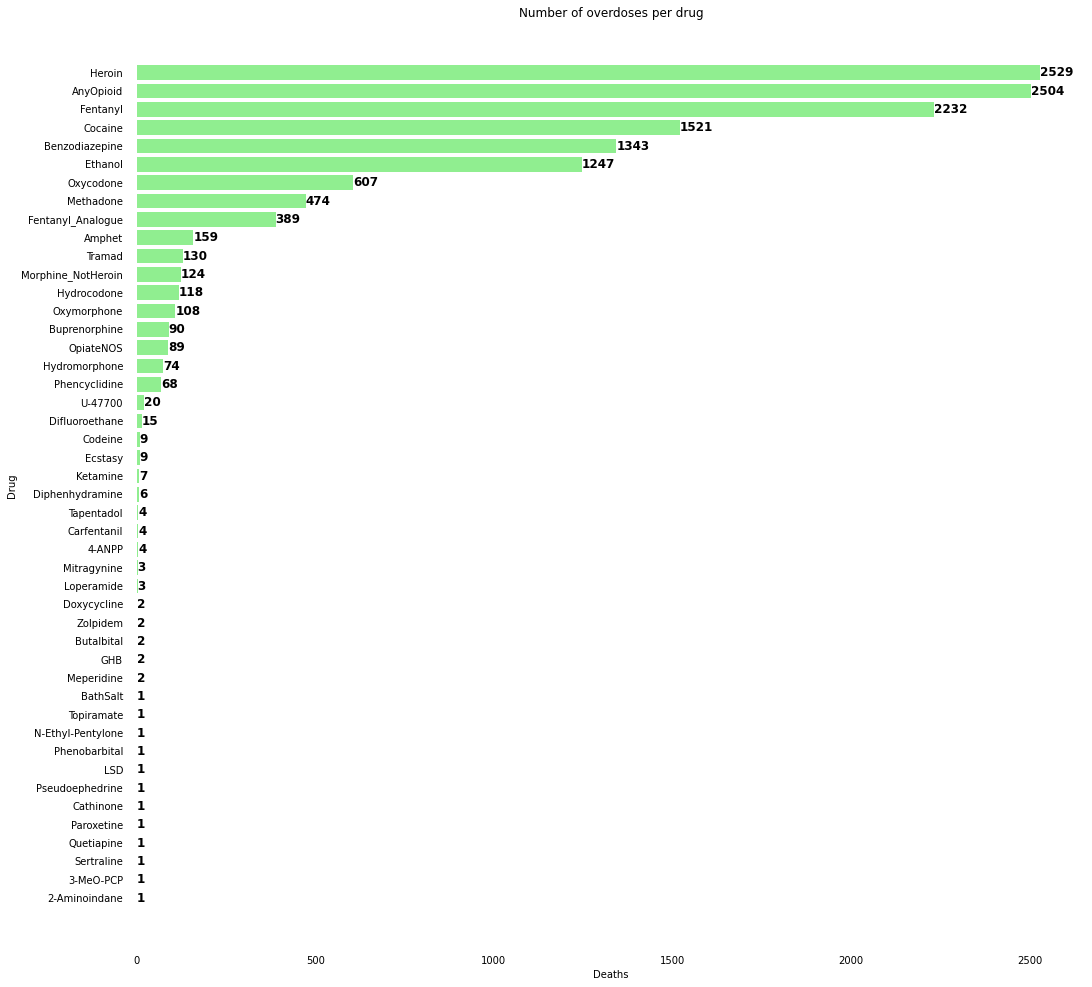

In [6]:
#Visualize drugs
fig, ax = plt.subplots(figsize =(17, 17))
ax.barh(range(len(all_drugs)), list(all_drugs.values()), color='lightgreen') 
plt.yticks(range(len(all_drugs)), list(all_drugs.keys()))
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

#ax.invert_yaxis() 

for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.2,  
             str(round((i.get_width()), 2)), 
             fontsize = 12, fontweight ='bold', 
             color ='Black') 
ax.set_title('Number of overdoses per drug', 
             loc ='center', ) 
ax.set_xlabel('Deaths')
ax.set_ylabel('Drug')
plt.show()

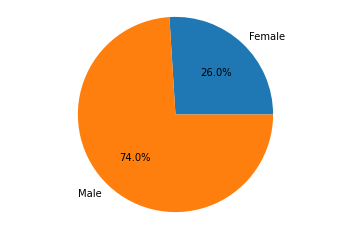

In [7]:
# Visualize sex
data.Sex.replace(['Male', 'Female'], [0, 1], inplace = True)
male = (data['Sex'] == 0).sum()
female = (data['Sex'] == 1).sum()
myLabels = 'Female', 'Male'
plt.pie((female, male),labels=myLabels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()


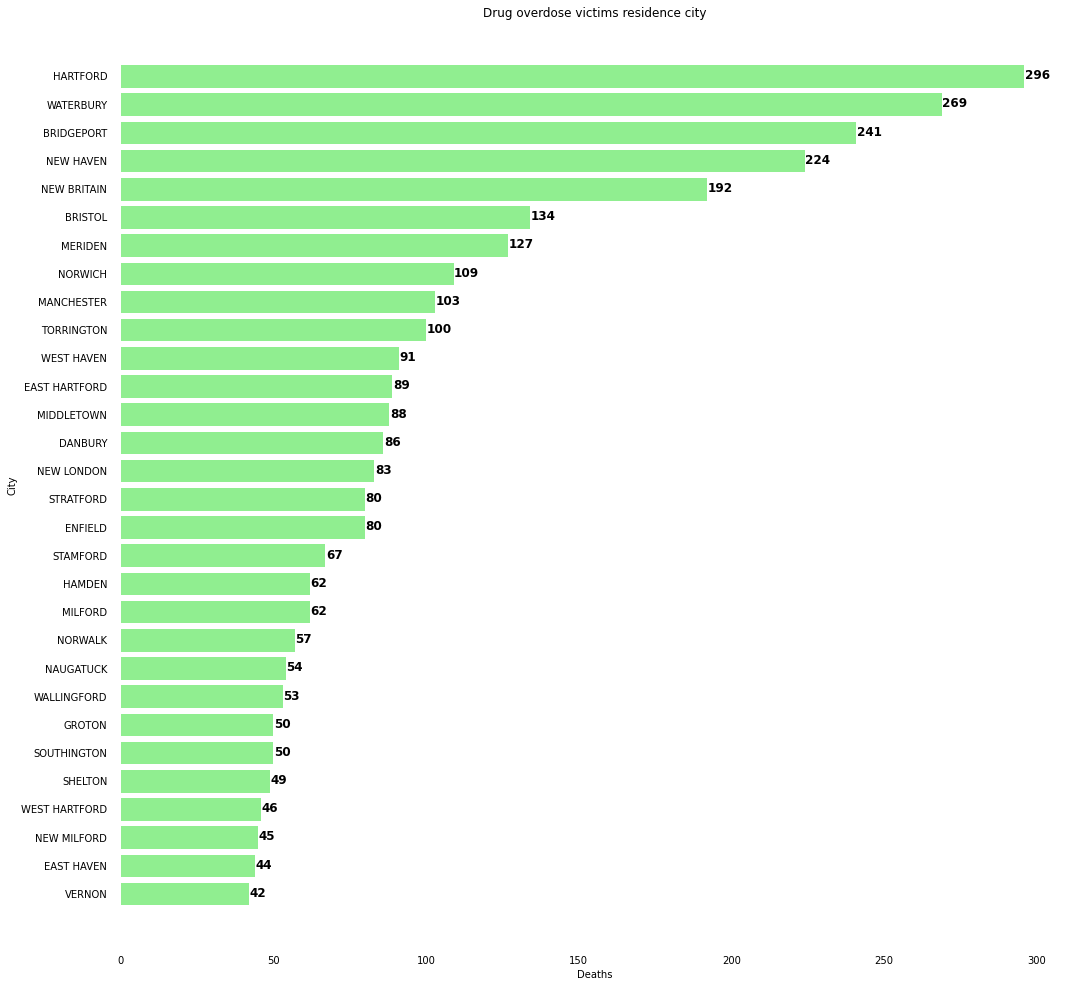

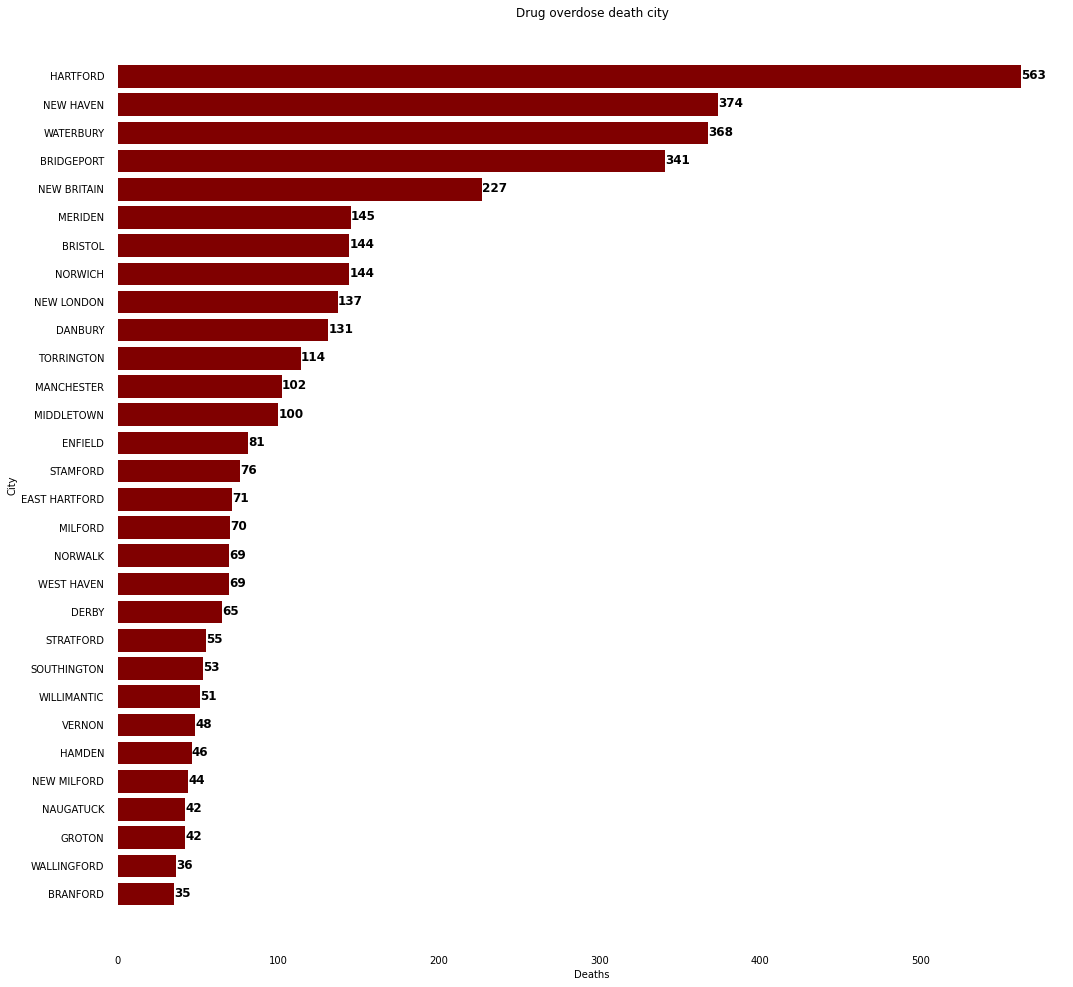

In [8]:
# Visualize resident location
residentCount = pd.DataFrame(data['ResidenceCity'].value_counts())

fig, ax = plt.subplots(figsize =(17, 17))
ax.barh(residentCount.index[:30], residentCount['ResidenceCity'][:30], color='lightgreen') 

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Show top as first
ax.invert_yaxis() 

for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 12, fontweight ='bold', 
             color ='Black') 
  
# Add Plot Title 
ax.set_title('Drug overdose victims residence city', 
             loc ='center', ) 
ax.set_xlabel('Deaths')
ax.set_ylabel('City')
  
# Show Plot 
plt.show() 


# Visualize death location
deathCount = pd.DataFrame(data['DeathCity'].value_counts())

fig, ax = plt.subplots(figsize =(17, 17))
ax.barh(deathCount.index[:30], deathCount['DeathCity'][:30], color = 'maroon') 

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Show top as first
ax.invert_yaxis() 

for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 12, fontweight ='bold', 
             color ='Black') 
  
# Add Plot Title 
ax.set_title('Drug overdose death city', 
             loc ='center', ) 
ax.set_xlabel('Deaths')
ax.set_ylabel('City')
  
# Show Plot 
plt.show() 

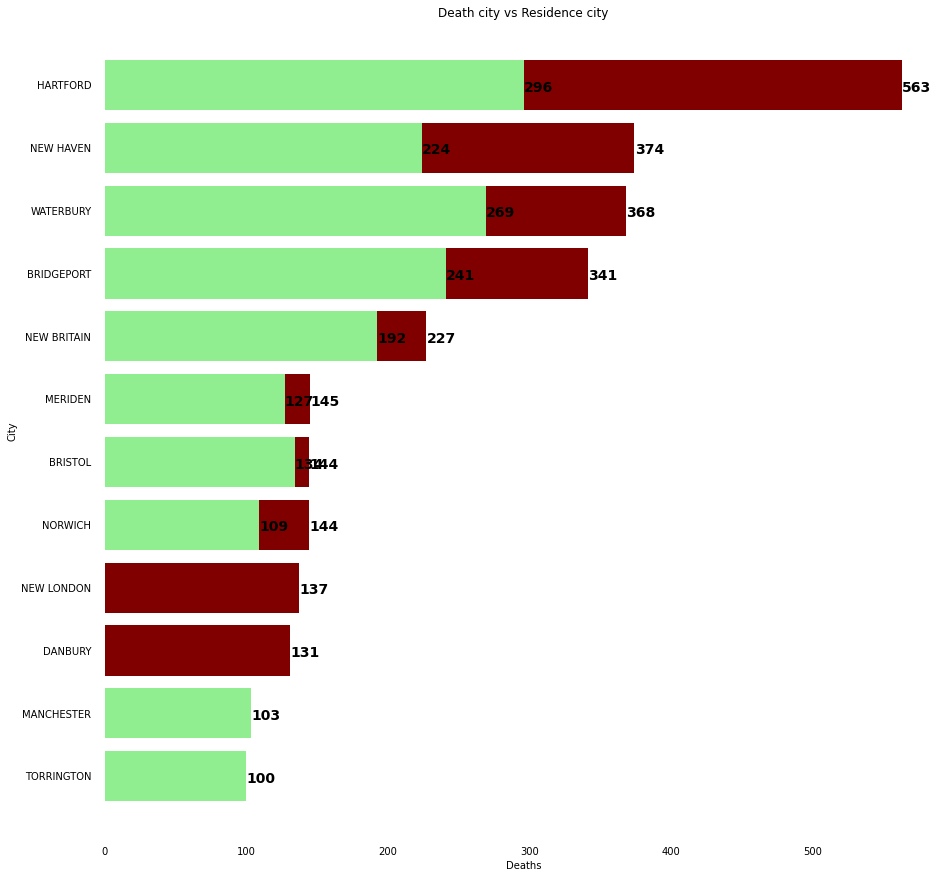

In [9]:
fig, ax = plt.subplots(figsize =(15, 15))
ax.barh(deathCount.index[:10], deathCount['DeathCity'][:10], color = 'maroon')
ax.barh(residentCount.index[:10], residentCount['ResidenceCity'][:10], color = 'lightgreen')

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Show top as first
ax.invert_yaxis() 

for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 14, fontweight ='bold', 
             color ='Black') 
  
# Add Plot Title 
ax.set_title('Death city vs Residence city', 
             loc ='center', ) 
ax.set_xlabel('Deaths')
ax.set_ylabel('City')
  
# Show Plot 
plt.show() 


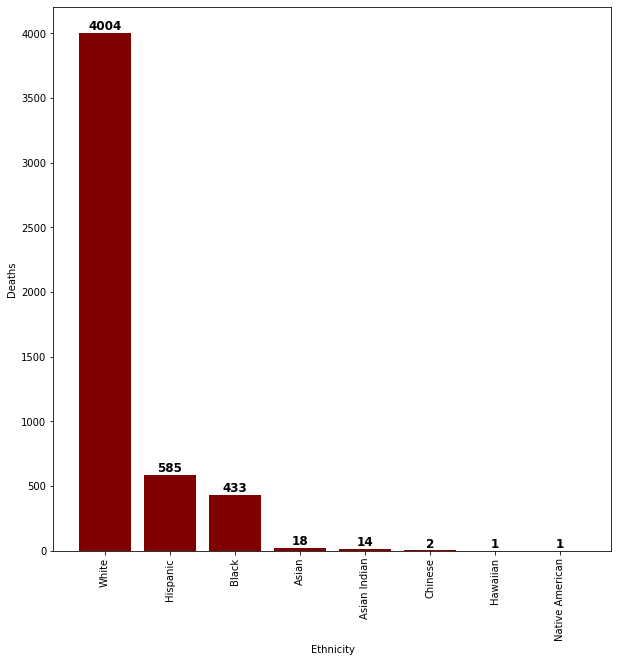

In [10]:
#Visualize race

index = 0
for i in data['Race']:
  if "," in str(i):
    race = i.split(',')[0]
    data.iloc[index, data.columns.get_loc('Race')] = race
  index += 1

data = data.drop(data[data.Race == "Unknown"].index)
data = data.drop(data[data.Race == "Other"].index)

race = pd.DataFrame(data['Race'].dropna().value_counts())

fig, ax =  plt.subplots(figsize =(10,10))
ax.bar(race.index, race['Race'], color = 'maroon')

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize = 12, fontweight ='bold', 
             color ='Black')
    
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Deaths')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


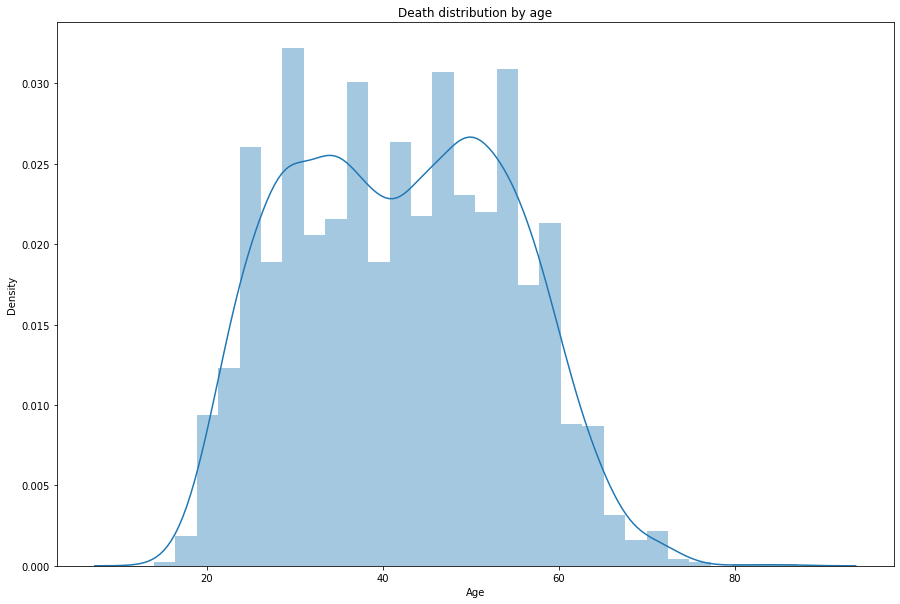

In [11]:
# Visualize age
plt.figure(figsize=(15,10))
ax = sns.distplot(data['Age'].dropna(),bins = 30)
plt.xlabel('Age')
plt.title('Death distribution by age')
plt.show()

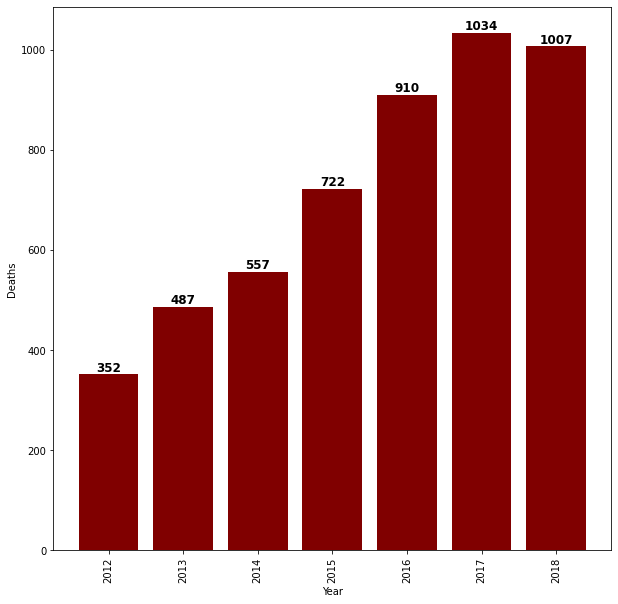

In [12]:
# Visualize death per year
year = pd.DataFrame(pd.to_datetime(data['Date']).dt.year.value_counts())
year.index = year.index.astype('int64')

fig, ax =  plt.subplots(figsize =(10,10))
ax.bar(year.index, year['Date'], color = 'maroon')

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize = 12, fontweight ='bold', 
             color ='Black')

ax.set_xlabel('Year')
ax.set_ylabel('Deaths')
plt.xticks(rotation=90)
plt.show()

In [25]:
#Find increase
#Conneticut 2012 and 2017 population: 3 600 000
residentDeath2012 = 352 / 36
#9.7 deaths per 100 000 residents

residentDeath2017 = 1034 / 36
#17.7 deaths per 100 000 residents

print("The rate of overdose deaths in Connecticut has increased from 2012 to 2017 by " + str(round(residentDeath2017 * 100 / residentDeath2012)) + " percent.")



The rate of overdose deaths in Connecticut has increased from 2012 to 2017 by 294 percent.
